<a href="https://colab.research.google.com/github/Data-Citadel/DeepLearning-Assignment1/blob/main/DL_Assignment_PS5_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Dataset-MNIST Fashion Dataset


## 1. Import Libraries/Dataset

In [18]:

# Import tensorflow and keras library
import tensorflow as tf

from tensorflow import keras

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Time library
import time

## 1.1 Load Dataset

In [3]:
# Load MNIST Fashion dataset from keras library
fashion_data = keras.datasets.fashion_mnist

# Destructuring the data into train and test
(X_train_full, y_train_full), (X_test, y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 1.2 GPU Availability

In [4]:
# Checking for GPU availability
print("Is GPU enabled in this machine? \n{}".format(tf.config.list_physical_devices('GPU')))

Is GPU enabled in this machine? 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Data Visualization

### 2.1 Shape of Train and Test data

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
print("Shape of Training Data : {}".format(X_train_full.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Training Data : (60000, 28, 28)
Shape of Test Data : (10000, 28, 28)


In [7]:
# Number of classes
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 2.2 Plot image data

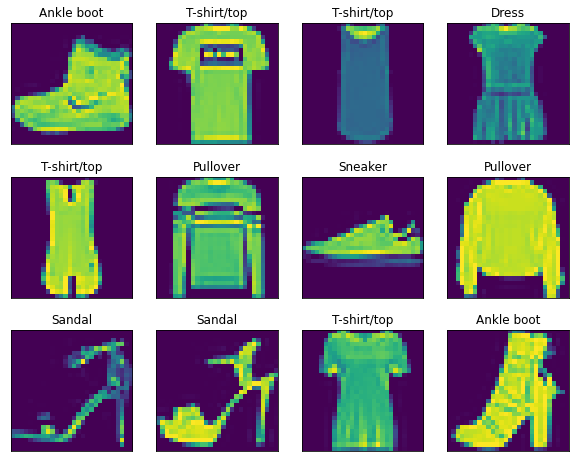

In [8]:
plt.figure(figsize=(10,8))

for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train_full[i])
  index = y_train_full[i]
  plt.title(class_names[index])
  plt.xticks([])
  plt.yticks([])

plt.show()

## 3. Data Pre-Processing

### 3.1 Split the data into Train, Holdout and Dev(test)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [10]:
print("Shape of Training set {}".format(X_train.shape))
print("Shape of Holdout set {}".format(X_valid.shape))

Shape of Training set (48000, 28, 28)
Shape of Holdout set (12000, 28, 28)


## 4. Model Building

A function to construct a network with 3-Dense layers with appropriate input layer will be defined. 

In [58]:
def build_model():
  # L2 regularizer rate
  l2_rate = 01e-3 # 0.001 
  do_rate = 0.3 # Dropout rate

  input_layer = keras.layers.Input(shape=[28,28,1]) # input layer with shape 28x28x1 as 28 pixels in column and rows
  
  flatten = keras.layers.Flatten()(input_layer) # Flatten the image input into rowwise pixels

  hidden1 = keras.layers.Dense(256, activation='relu', 
                               kernel_regularizer=keras.regularizers.L2(l2_rate))(flatten)
  
  dropout_layer_1 = keras.layers.Dropout(do_rate)(hidden1)

  hidden2 = keras.layers.Dense(256, activation='relu', 
                               kernel_regularizer=keras.regularizers.L2(l2_rate))(dropout_layer_1)
  
  dropout_layer_2 = keras.layers.Dropout(do_rate)(hidden2)

  hidden3 = keras.layers.Dense(128, activation='relu', 
                               kernel_regularizer=keras.regularizers.L2(l2_rate))(dropout_layer_2)

  dropout_layer_3 = keras.layers.Dropout(do_rate)(hidden3)

  output = keras.layers.Dense(10, activation='softmax')(dropout_layer_3)

  model = keras.Model(inputs=input_layer, outputs=output)

  return model


In [59]:
# Building a model
ffnn_model = build_model()

In [60]:
ffnn_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

## 5. Compile the model

The model is compiled with the following parameters
1. Loss Function - Sparse Categorical Cross Entropy
2. Optimizer - ADAM with learning rate 0.001
3. Metrics - Accuracy

In [61]:
ffnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

## 6. Train Model

The model will be trained by fitting the training and validation data. 

In [68]:
epochs_run = 20
batchsize = 256

# start time
start_time = time.perf_counter()

# Fitting the data
history = ffnn_model.fit(X_train, 
                         y_train, 
                         epochs=epochs_run, 
                         batch_size=batchsize,
                         validation_data=(X_valid, y_valid), 
                         verbose=1)

elapsed = time.perf_counter() - start_time

print("--"*60)
print("Total time taken for training {:.2f} seconds".format(elapsed))

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5570 - accuracy: 0.8338 - val_loss: 0.5052 - val_accuracy: 0.8622
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5390 - accuracy: 0.8383 - val_loss: 0.4971 - val_accuracy: 0.8576
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5322 - accuracy: 0.8428 - val_loss: 0.4987 - val_accuracy: 0.8589
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5269 - accuracy: 0.8410 - val_loss: 0.4929 - val_accuracy: 0.8555
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5248 - accuracy: 0.8381 - val_loss: 0.4775 - val_accuracy: 0.8613
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5331 - accuracy: 0.8385 - val_loss: 0.4899 - val_accuracy: 0.8584
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.8403 - val_loss: 0.4782 - val_accuracy: 0.8614
Epoch 

In [69]:
val_loss, val_acc = ffnn_model.evaluate(X_valid, y_valid)

print("\n\nValidation Loss {:.3f} and Validation Accuracy {:.2f}%".format(val_loss, val_acc))

375/375 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.8562


Validation Loss 0.497 and Validation Accuracy 0.86%


## 7. Model Evaluation

### a. Score with Test data


In [70]:
y_preds = ffnn_model.predict(X_test)

In [66]:
# Converting Logits to Class code using argmax()
y_hat = tf.argmax(y_preds, 1)

In [71]:
print("Confusion Matrix: \n {}".format(classification_report(y_test, y_hat)))

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.68      0.78      0.73      1000
           3       0.82      0.89      0.85      1000
           4       0.71      0.80      0.75      1000
           5       0.95      0.95      0.95      1000
           6       0.75      0.36      0.48      1000
           7       0.93      0.93      0.93      1000
           8       0.91      0.97      0.94      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

